### Imports

In [5]:
########## Imports ##########

import numpy as np
import pandas as pd
from packages import fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re

from datetime import datetime
from time import time

# Outliers
from sklearn.ensemble import IsolationForest

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [6]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [7]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

#df = pd.read_csv('../../data/flipkart_com-ecommerce_sample_1050.csv') # maison
df = pd.read_csv('../data/flipkart_com-ecommerce_sample_1050.csv') # bureau
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### Analyse exploratoire des données (EDA)

In [8]:
# Caractéristiques générales du jeu de données

In [9]:
df.shape

(1050, 15)

In [10]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [12]:
########## Duplicats ##########

fonctions.remove_duplicates(df)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 341

Pourcentage de valeurs manquantes : 2.17


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
brand,338,32.19
retail_price,1,0.10
discounted_price,1,0.10
product_specifications,1,0.10



Heatmap des valeurs manquantes : 



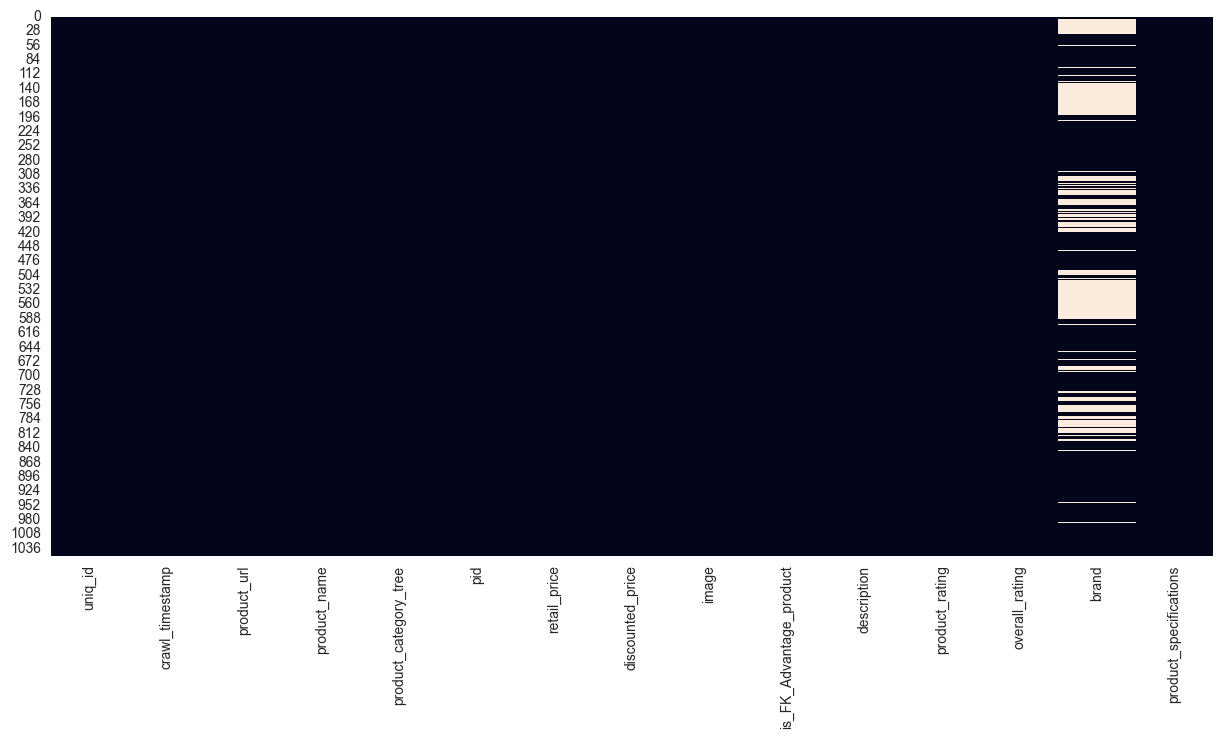

In [13]:
########## Valeurs manquantes ##########

# Identification des valeurs manquantes par variable :
fonctions.nan_detection(df)

# -> nombreuses pour 'brand' (30%)
# -> peu nombreuses pour 'retail_price', 'discounted_price', 'product_specifications' (1 seule valeur manquante)

# est-ce pour la même ligne ?

In [14]:
df.loc[df['retail_price'].isna()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [15]:
# même ligne pour retail_price et discounted_price mais pas pour product_specifications

########## Gestion des valeurs manquantes ##########
# -> drop des deux lignes pour lesquelles on a 1 valeur manquante pour les 3 variables
# -> drop de la feature 'brand' ?

df.drop(['brand'], axis = 1, inplace = True)

In [16]:
df.dropna(inplace = True)

In [17]:
fonctions.nan_detection(df)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


In [18]:
df.shape

(1048, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1048 non-null   object 
 1   crawl_timestamp          1048 non-null   object 
 2   product_url              1048 non-null   object 
 3   product_name             1048 non-null   object 
 4   product_category_tree    1048 non-null   object 
 5   pid                      1048 non-null   object 
 6   retail_price             1048 non-null   float64
 7   discounted_price         1048 non-null   float64
 8   image                    1048 non-null   object 
 9   is_FK_Advantage_product  1048 non-null   bool   
 10  description              1048 non-null   object 
 11  product_rating           1048 non-null   object 
 12  overall_rating           1048 non-null   object 
 13  product_specifications   1048 non-null   object 
dtypes: bool(1), float64(2), objec

In [20]:
########## uniq_id ###########
# id uniques

df['uniq_id'].nunique()

1048

In [21]:
########## crawl_timestamp ##########
df['crawl_timestamp']

0       2016-04-30 03:22:56 +0000
1       2016-04-30 03:22:56 +0000
3       2016-06-20 08:49:52 +0000
4       2016-06-20 08:49:52 +0000
5       2015-12-04 07:25:36 +0000
                  ...            
1045    2015-12-01 10:15:43 +0000
1046    2015-12-01 10:15:43 +0000
1047    2015-12-01 10:15:43 +0000
1048    2015-12-01 10:15:43 +0000
1049    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 1048, dtype: object

In [22]:
# modifier le format pour enlever le '+0000'
df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : x.removesuffix(' +0000'))
df['crawl_timestamp']

0       2016-04-30 03:22:56
1       2016-04-30 03:22:56
3       2016-06-20 08:49:52
4       2016-06-20 08:49:52
5       2015-12-04 07:25:36
               ...         
1045    2015-12-01 10:15:43
1046    2015-12-01 10:15:43
1047    2015-12-01 10:15:43
1048    2015-12-01 10:15:43
1049    2015-12-01 10:15:43
Name: crawl_timestamp, Length: 1048, dtype: object

In [23]:
########## product_url ##########
df['product_url'].nunique()

1048

In [24]:
########## product_name ##########
df['product_name'].nunique()

1048

In [25]:
########## product_category_tree ##########
df['product_category_tree'].nunique()

640

In [26]:
########## pid ##########
df['pid'].nunique()

1048

In [27]:
########## retail_price ##########
df['retail_price'].nunique()

354

In [28]:
df['retail_price'].value_counts()

retail_price
999.0      63
499.0      49
599.0      41
1499.0     31
399.0      25
           ..
570.0       1
10999.0     1
3690.0      1
190.0       1
1190.0      1
Name: count, Length: 354, dtype: int64

In [29]:
df['product_rating'].value_counts()

product_rating
No rating available    887
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: count, dtype: int64

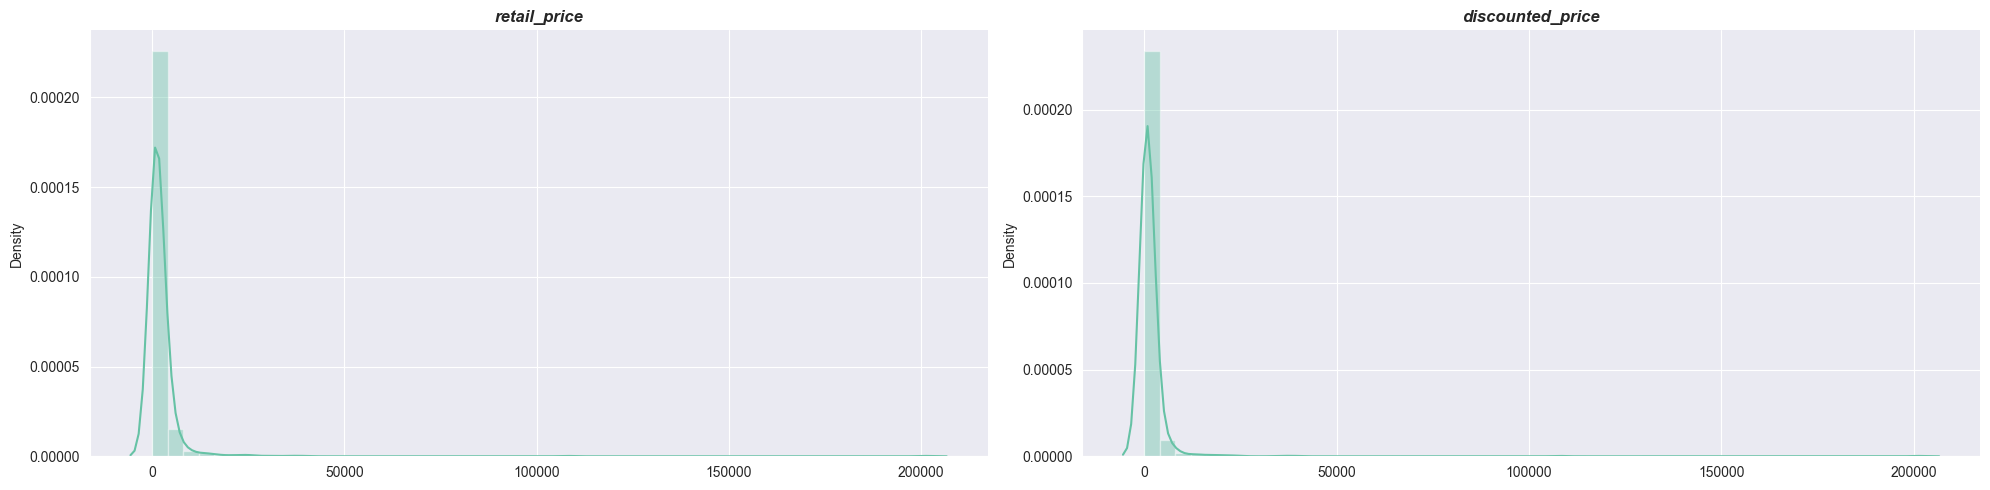

In [30]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

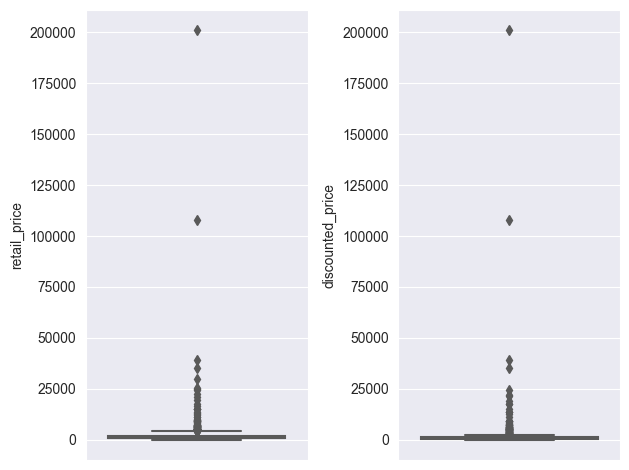

In [31]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

In [32]:
# -> outliers

In [33]:
########## Outliers ##########

# prérequis -> plus de nan

# la présence d'outliers a été detecté grâce aux analyses précedantes (cf cartes, boxplots...)
# utiliser l'Isolation Forest et supprimer lignes/valeurs correspondantes
clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([ 1,  1,  1, ..., -1,  1,  1])

In [34]:
# anomalies ont un score de -1 : les supprimer
df.drop(df.iloc[np.where(preds == -1)[0]].index, inplace = True)

df.shape

(924, 14)

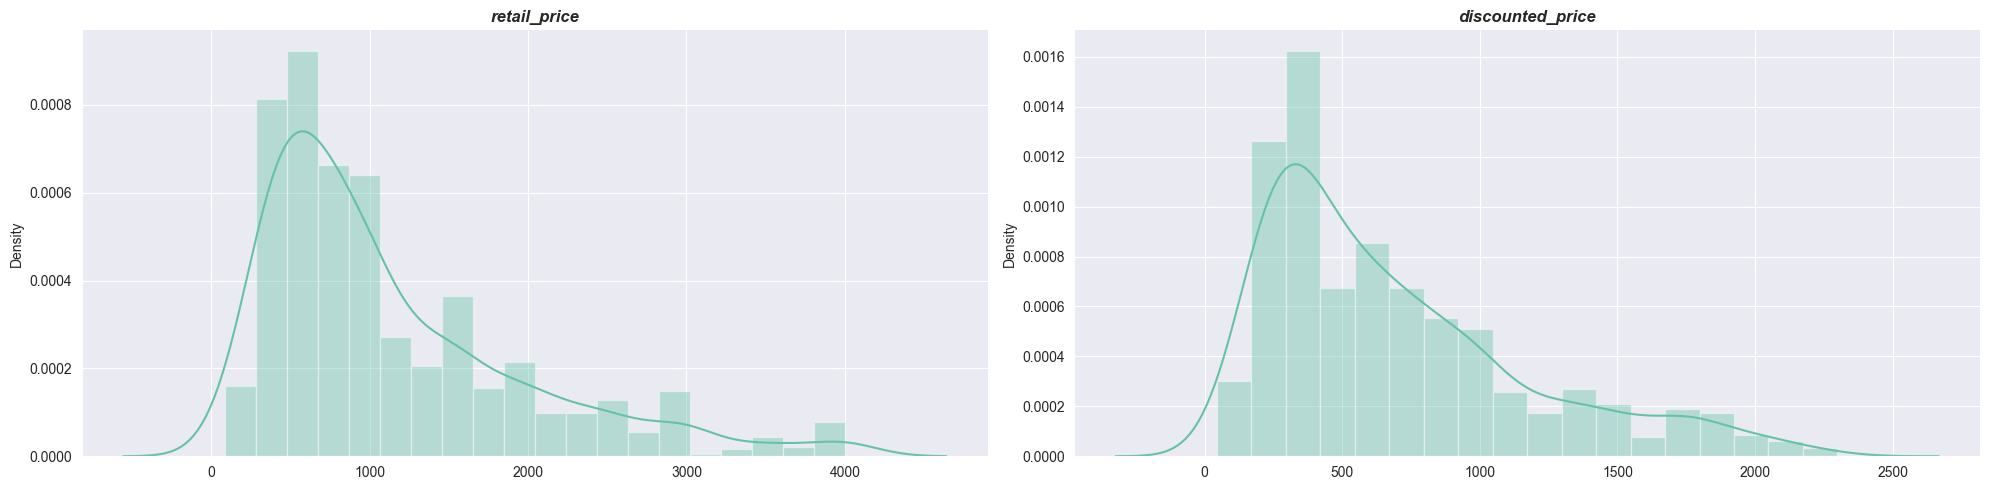

In [35]:
########## Analyse univariée ##########

# Displots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure(figsize = (20, 5))
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.distplot(x = df[col])
    plt.title(col, fontweight = 'bold', fontstyle = 'italic')
    sns.despine() # pour enlever limites du graph en haut et à droite
    figure.tight_layout()
plt.show()

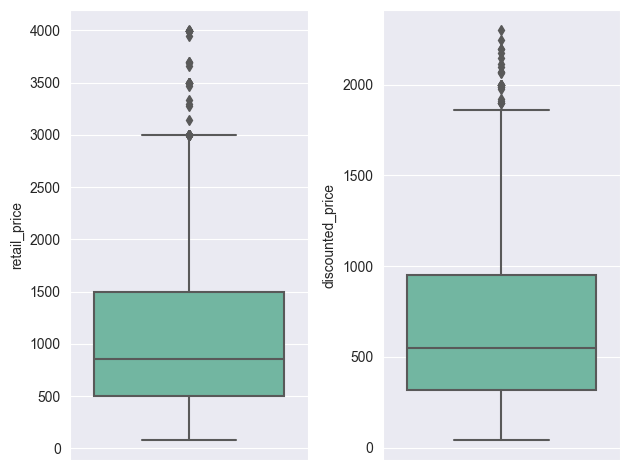

In [36]:
# Boxplots des variables quantitatives
columns = df.select_dtypes(include = ['float64', 'int64']).columns

figure = plt.figure()
for index, col in enumerate(columns):
    figure.add_subplot(1, 2, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

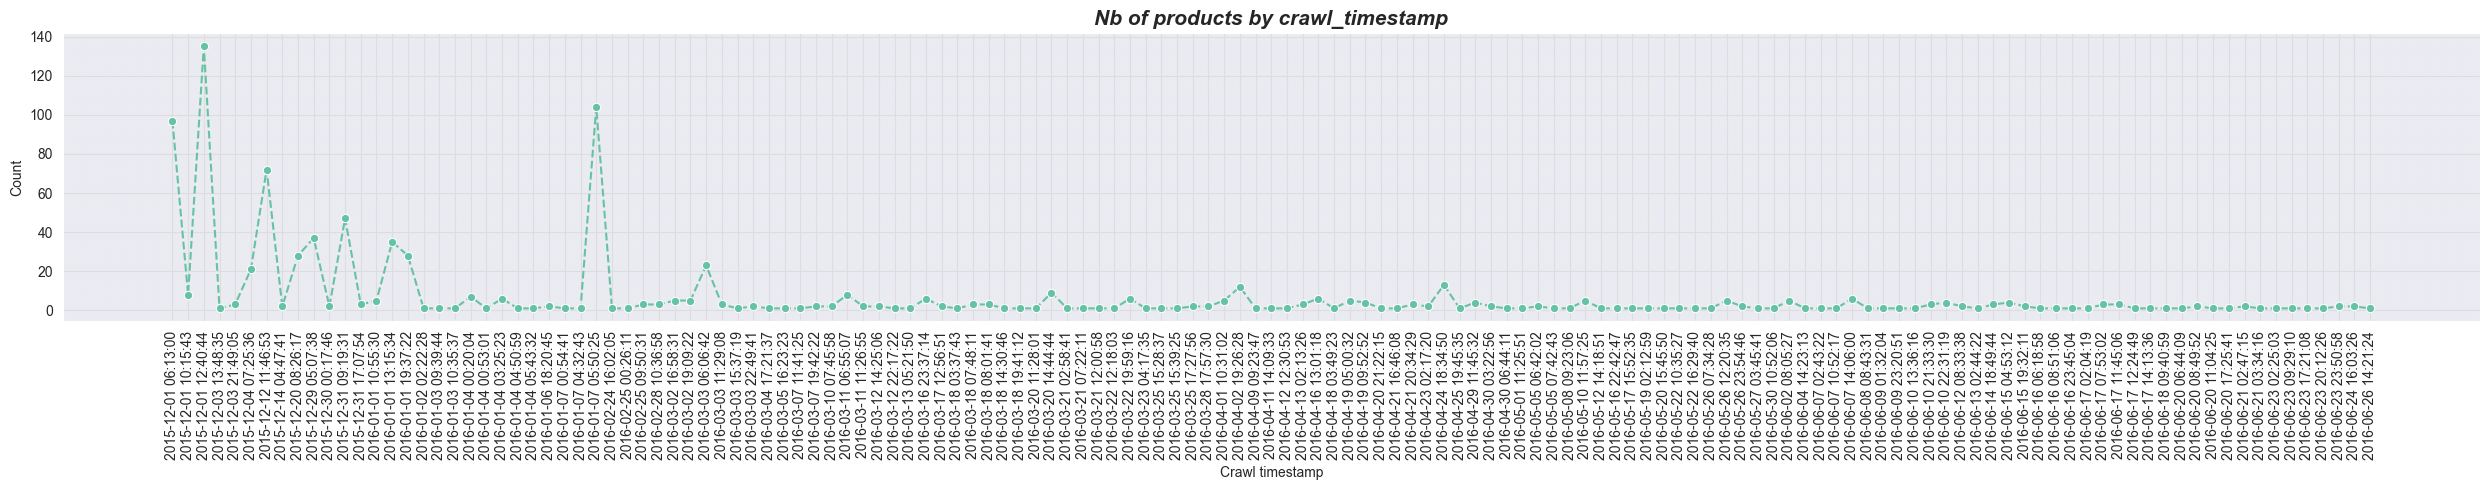

In [37]:
## evolution du nb de produit par crawl_timestamp

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [38]:
# enlever heure ?

df['crawl_timestamp'] = df['crawl_timestamp'].apply(lambda x : datetime.strptime(x , '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
df['crawl_timestamp']

0       2016-04-30
1       2016-04-30
3       2016-06-20
4       2016-06-20
6       2015-12-04
           ...    
1043    2015-12-01
1044    2015-12-01
1045    2015-12-01
1048    2015-12-01
1049    2015-12-01
Name: crawl_timestamp, Length: 924, dtype: object

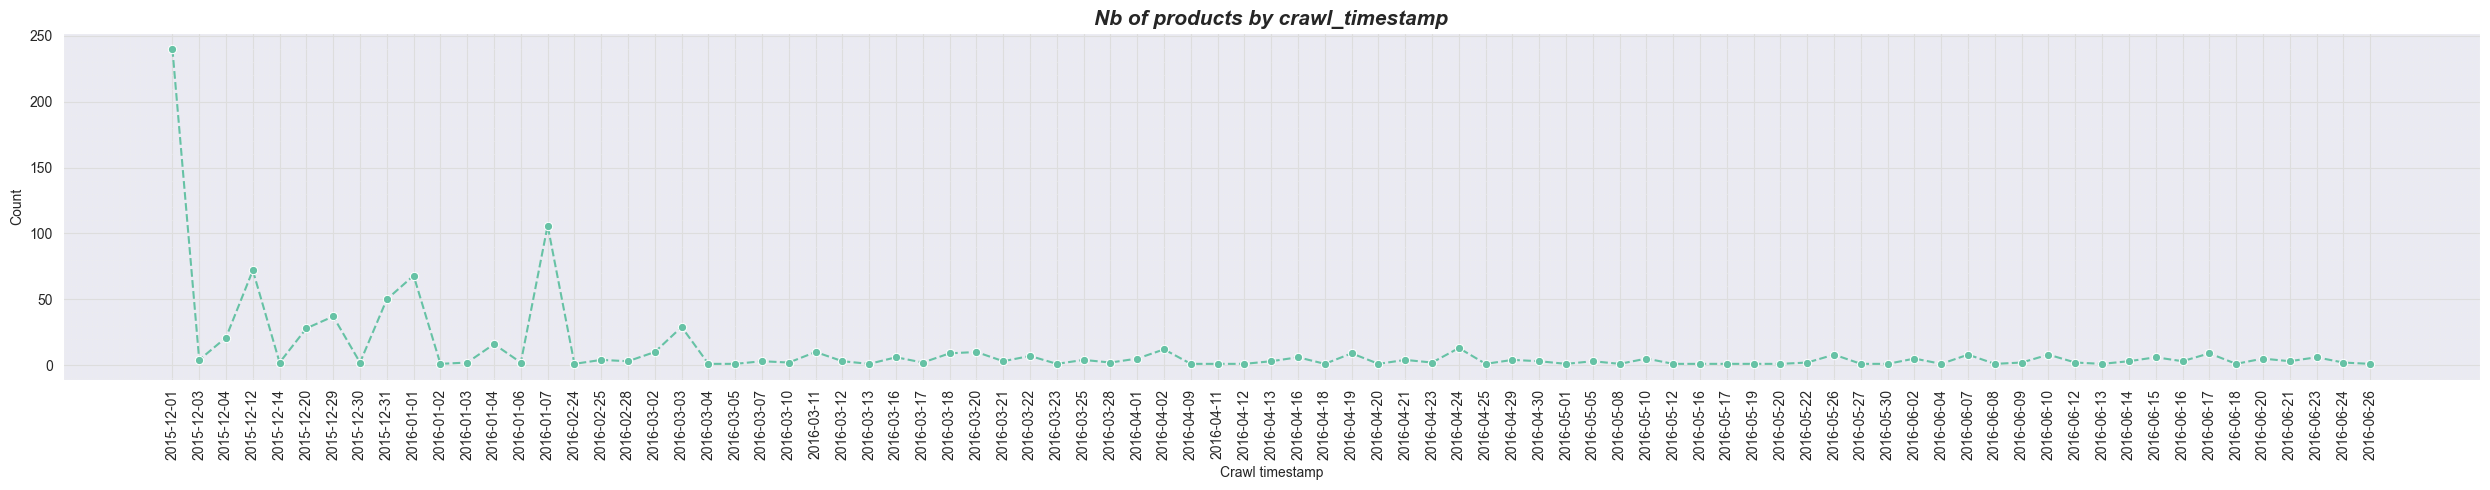

In [39]:
## evolution du nb de produit par crawl_timestamp

plt.figure(figsize = (25, 5))
sns.lineplot(
    x = df.groupby('crawl_timestamp')['uniq_id'].count().index,
    y = df.groupby('crawl_timestamp')['uniq_id'].count().values,
    marker = 'o',
    linestyle = '--'
    )
plt.title('Nb of products by crawl_timestamp', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.xlabel('Crawl timestamp')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Exploration des données textes

In [40]:
# Rapide exploration des données textes pour définir quelles fetures utiliser

In [41]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa..."
6,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,"{""product_specification""=>[{""key""=>""Chronograp..."


In [42]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications'],
      dtype='object')

In [43]:
# Variables texte :
# - uniq_id -> '55b85ea15a1536d46b7190ad6fff8ce7 - id unique du produit - non pertinent
# - product_url -> 'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z' - url du produit - non pertinent
# - product_name -> 'Elegance Polyester Multicolor Abstract Eyelet Door Curtain' - nom du produit
# - product_category_tree -> '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]' - arborescence du produit
# - pid -> 'CRNEG7BKMFFYHQ8Z' -> ?????
# - description -> description du produit
# - brand -> marque
# - product_specifications -> toutes les info produits organisées en dictionnaire

In [44]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [45]:
df['product_specifications'][0].replace('=>', ':').replace('{"product_specification":', '')

'[{"key":"Brand", "value":"Elegance"}, {"key":"Designed For", "value":"Door"}, {"key":"Type", "value":"Eyelet"}, {"key":"Model Name", "value":"Abstract Polyester Door Curtain Set Of 2"}, {"key":"Model ID", "value":"Duster25"}, {"key":"Color", "value":"Multicolor"}, {"key":"Length", "value":"213 cm"}, {"key":"Number of Contents in Sales Package", "value":"Pack of 2"}, {"key":"Sales Package", "value":"2 Curtains"}, {"key":"Material", "value":"Polyester"}]}'

In [46]:
print(re.findall(r"\w+", df['product_specifications'][0]))

['product_specification', 'key', 'Brand', 'value', 'Elegance', 'key', 'Designed', 'For', 'value', 'Door', 'key', 'Type', 'value', 'Eyelet', 'key', 'Model', 'Name', 'value', 'Abstract', 'Polyester', 'Door', 'Curtain', 'Set', 'Of', '2', 'key', 'Model', 'ID', 'value', 'Duster25', 'key', 'Color', 'value', 'Multicolor', 'key', 'Length', 'value', '213', 'cm', 'key', 'Number', 'of', 'Contents', 'in', 'Sales', 'Package', 'value', 'Pack', 'of', '2', 'key', 'Sales', 'Package', 'value', '2', 'Curtains', 'key', 'Material', 'value', 'Polyester']


In [47]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [48]:
print(re.findall(r"\w+", df['product_category_tree'][0]))

['Home', 'Furnishing', 'Curtains', 'Accessories', 'Curtains', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Do']


In [49]:
df['product_name'][0]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain'

In [50]:
# product_category_tree -> pour extraire la catégorie du produit
# description -> pour faire l'analyse de texte

In [51]:
sentence = '["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

match = re.search(r'(?:\w+\s+){2}(?=\>\>)', sentence)

if match:
    result = match.group(0).strip()
    print(result)

Home Furnishing


In [52]:
df['category'] = df.apply(fonctions.get_category, axis = 1)
df['category']

0       Home Furnishing
1             Baby Care
3       Home Furnishing
4       Home Furnishing
6         Wrist Watches
             ...       
1043          Baby Care
1044          Baby Care
1045          Baby Care
1048          Baby Care
1049          Baby Care
Name: category, Length: 924, dtype: object

In [53]:
df['category'].value_counts()

category
Personal Care          142
Wrist Watches          139
Baby Care              135
Home Furnishing        132
Festive Needs          119
Laptop Accessories      79
Coffee Mugs             74
Network Components      24
Kitchen Tools           14
Water bottle             7
Bar Glasses              5
Bar Accessories          3
Tablet Accessories       3
Lunch Boxes              2
Pen Drives               2
Craft Jugs               1
Bhalaria Forks           1
Table Clocks             1
Kitchen Containers       1
Caffeine Bowls           1
Idli Makers              1
Omic Sippers             1
BFT Bulbs                1
Tray Sets                1
Computer Components      1
Name: count, dtype: int64

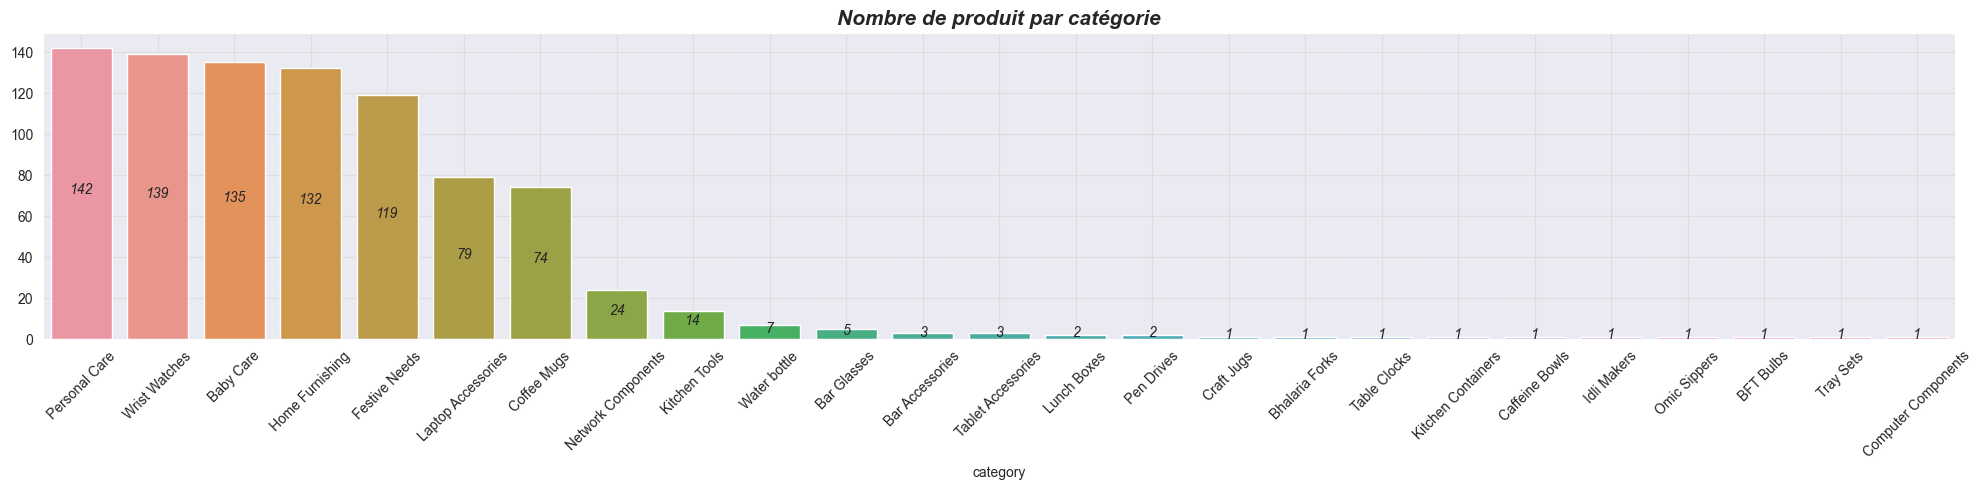

In [54]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['category'].value_counts().index,
    y = df['category'].value_counts().values
    )
fonctions.addlabels(x = df['category'].value_counts().index, y = df['category'].value_counts().values)
plt.xticks(rotation = 45)
plt.title('Nombre de produit par catégorie', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [55]:
# trop de catégories -> les regrouper
df['category'].unique()

array(['Home Furnishing', 'Baby Care', 'Wrist Watches', 'Festive Needs',
       'Tray Sets', 'BFT Bulbs', 'Personal Care', 'Coffee Mugs',
       'Network Components', 'Tablet Accessories', None,
       'Laptop Accessories', 'Lunch Boxes', 'Caffeine Bowls',
       'Water bottle', 'Omic Sippers', 'Pen Drives', 'Kitchen Tools',
       'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs',
       'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers',
       'Computer Components'], dtype=object)

In [56]:
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools',
        'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

In [57]:
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)

In [58]:
df['category_4'].value_counts()

category_4
Baby and Personal Care          277
Electronics and Accessories     248
Home and Kitchen Essential      245
Festive and Special Occasion    120
Name: count, dtype: int64

In [59]:
# fonctions suivantes -> non insérées dans le package fonctions.py (car ne serviront qu'une seule fois ici juste pour faire des tests)

In [60]:
########## Sous-catégorie ##########
def get_sous_category(row):
    match = re.search(r'(?<= >> )([^>>]+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_category'] = df.apply(get_sous_category, axis = 1)
df['sous_category']

0       Curtains & Accessories
1             Baby Bath & Skin
3                    Bed Linen
4                    Bed Linen
6                Wrist Watches
                 ...          
1043         Baby & Kids Gifts
1044         Baby & Kids Gifts
1045         Baby & Kids Gifts
1048         Baby & Kids Gifts
1049         Baby & Kids Gifts
Name: sous_category, Length: 924, dtype: object

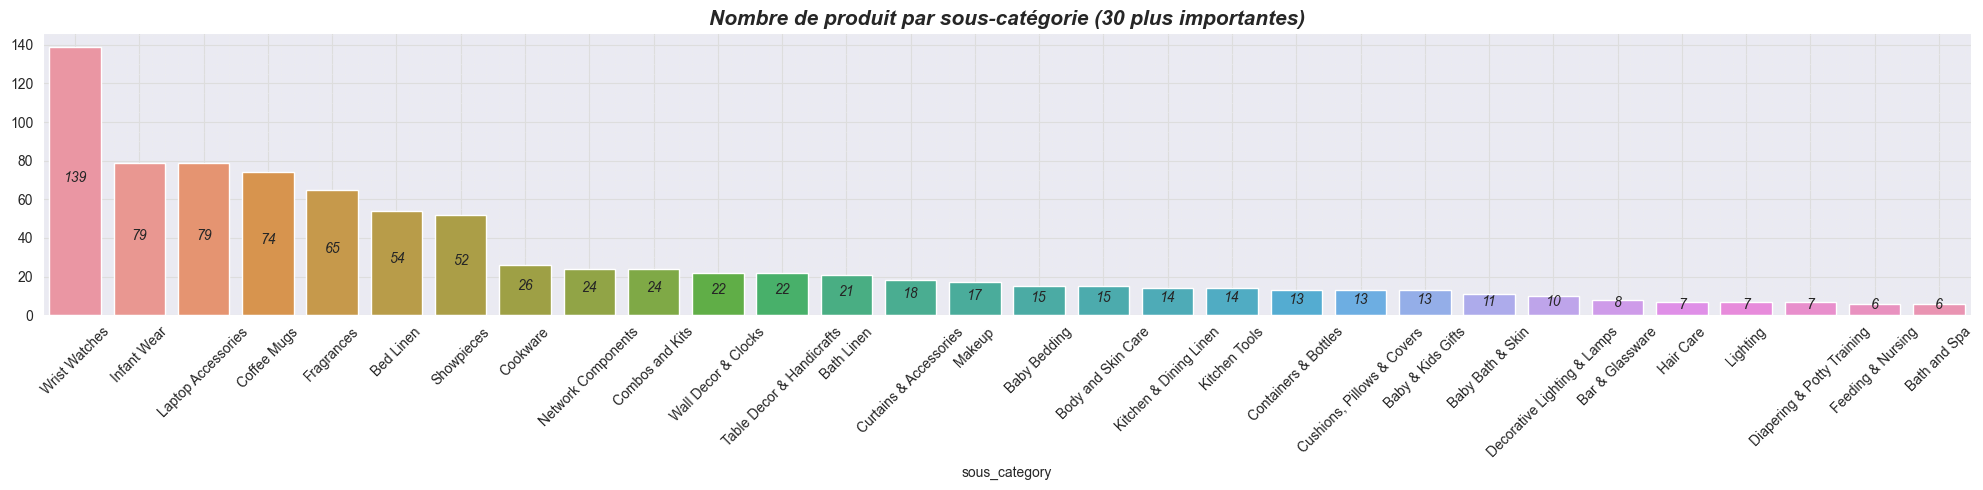

In [61]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_category'].value_counts()[:30].index,
    y = df['sous_category'].value_counts()[:30].values
    )
fonctions.addlabels(x = df['sous_category'].value_counts().index[:30], y = df['sous_category'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-catégorie (30 plus importantes)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [62]:
########## Sous-ensemble ##########
def get_sous_ensemble(row):
    match = re.search(r'(?<= >> )(\w+)', row['product_category_tree'])

    if match:
        result = match.group(1).strip()
        return result

df['sous_ensemble'] = df.apply(get_sous_ensemble, axis = 1)
df['sous_ensemble']

0       Curtains
1           Baby
3            Bed
4            Bed
6          Wrist
          ...   
1043        Baby
1044        Baby
1045        Baby
1048        Baby
1049        Baby
Name: sous_ensemble, Length: 924, dtype: object

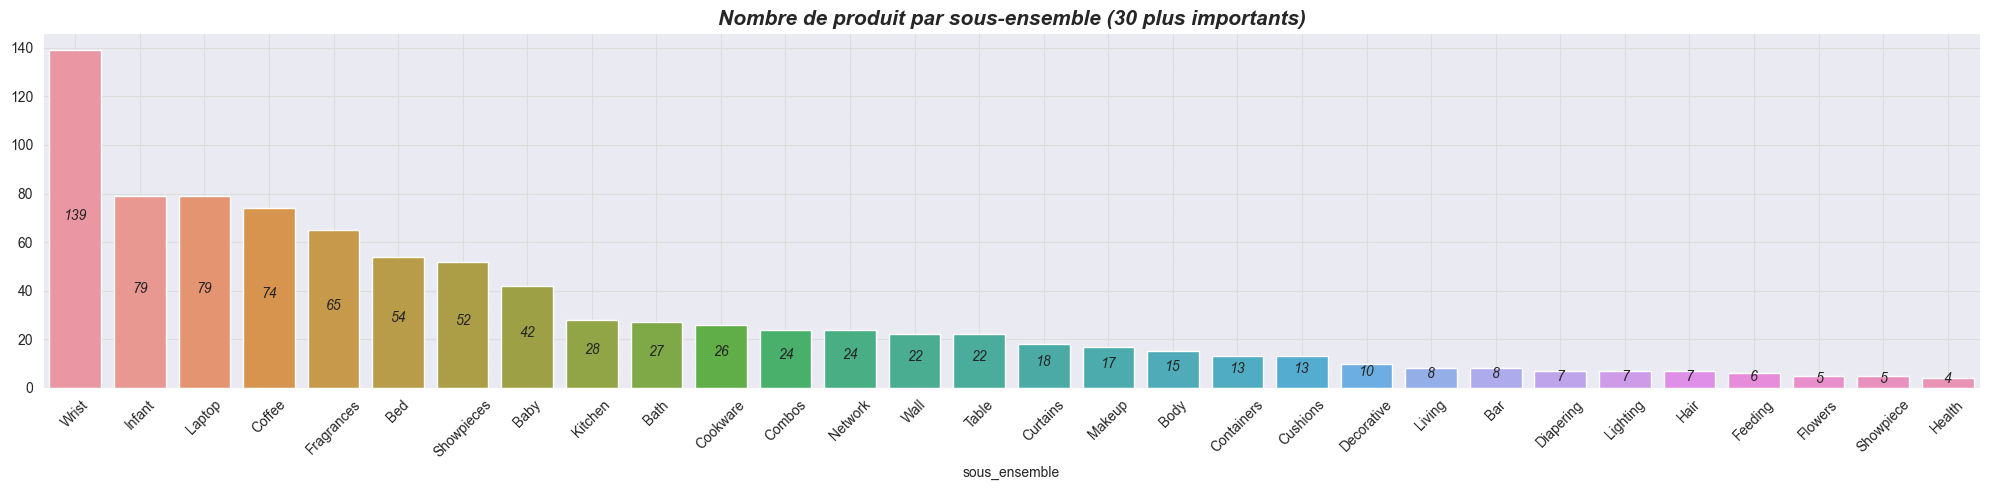

In [63]:
plt.figure(figsize = (20, 5))
sns.barplot(
    x = df['sous_ensemble'].value_counts()[:30].index,
    y = df['sous_ensemble'].value_counts()[:30].values
    )
fonctions.addlabels(x = df['sous_ensemble'].value_counts().index[:30], y = df['sous_ensemble'].value_counts().values[:30])
plt.xticks(rotation = 45)
plt.title('Nombre de produit par sous-ensemble (30 plus importants)', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [64]:
df.reset_index(drop = True, inplace = True)
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,category,category_4,sous_category,sous_ensemble
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Home and Kitchen Essential,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby and Personal Care,Baby Bath & Skin,Baby
2,d4684dcdc759dd9cdf41504698d737d8,2016-06-20,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Home and Kitchen Essential,Bed Linen,Bed
3,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Home and Kitchen Essential,Bed Linen,Bed
4,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,"{""product_specification""=>[{""key""=>""Chronograp...",Wrist Watches,Electronics and Accessories,Wrist Watches,Wrist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,38782cce965307ddcdbedfcb7fa409c3,2015-12-01,http://www.flipkart.com/999store-medium-paper-...,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBYYC92E2C,999.0,599.0,38782cce965307ddcdbedfcb7fa409c3.jpg,False,Buy 999store Medium Paper Sticker for Rs.599 o...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Sales Pack...",Baby Care,Baby and Personal Care,Baby & Kids Gifts,Baby
920,be0f39341d771aac57084970f1ed6425,2015-12-01,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UYBHF4MXU,1429.0,1143.0,be0f39341d771aac57084970f1ed6425.jpg,False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby and Personal Care,Baby & Kids Gifts,Baby
921,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,"{""product_specification""=>[{""key""=>"

In [65]:
df.shape

(924, 18)

In [67]:
########## Export ##########
# Export csv des données nettoyées

#df.to_csv(r"../../data/df_clean.csv", index = False) # maison
df.to_csv(r"../data/df_clean.csv", index = False) # bureau